In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Anuja\Music\New folder\LungCap.xls")
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
df.shape

(725, 6)

In [4]:
df.isnull().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [6]:
df.Smoke=le.fit_transform(df.Smoke)

In [7]:
df.Gender=le.fit_transform(df.Gender)

In [8]:
df.Caesarean=le.fit_transform(df.Caesarean)

In [9]:
df.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke               int32
Gender              int32
Caesarean           int32
dtype: object

In [10]:
#1 Method
outliers=[]
def detect_outliers(var):
    threshold=2
    mean=np.mean(var)
    std=np.std(var)
    
    for i in var:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [11]:
out=detect_outliers(df['LungCap(cc)'])
out

[1.125,
 1.575,
 13.875,
 1.85,
 13.2,
 0.507,
 1.175,
 2.475,
 1.025,
 1.625,
 14.375,
 2.0,
 1.9,
 2.25,
 1.925,
 2.375,
 14.675,
 13.375,
 1.675,
 1.775,
 1.325,
 13.375,
 2.25,
 2.25,
 1.45,
 2.025,
 14.55,
 13.375,
 13.325,
 1.95]

In [12]:
def remove_outliers(df,col,k=2.5):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[]

# Imputation

In [13]:
df["LungCap(cc)"].describe()

count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: LungCap(cc), dtype: float64

<Axes: >

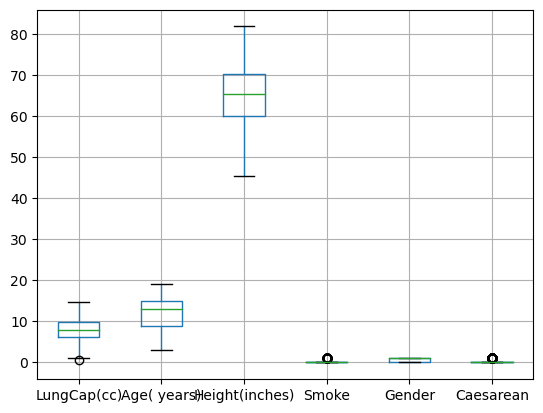

In [14]:
df.boxplot()

In [15]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=df,y="LungCap(cc)")

<Axes: ylabel='LungCap(cc)'>

In [16]:
df.rename(columns={'LungCap(cc)': 'lc'}, inplace=True)

In [17]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [18]:
y.head(2)

,lc
0,6.475
1,10.125


In [19]:
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((580, 5), (145, 5), (580, 1), (145, 1))

In [22]:
from sklearn import linear_model
ln=linear_model.LinearRegression()

In [23]:
ln.fit(x_train,y_train)

LinearRegression()

In [24]:
p1=ln.predict(x_test)
p1

array([[ 7.54766894],
       [ 5.68204508],
       [ 6.32558014],
       [10.79158567],
       [ 3.47236857],
       [ 5.63130484],
       [ 7.27875094],
       [ 4.71141679],
       [ 8.91580848],
       [ 4.95831192],
       [11.72347409],
       [ 7.56462836],
       [ 5.91965819],
       [10.37350125],
       [ 4.21082044],
       [ 7.82945863],
       [ 5.41906185],
       [ 7.88227746],
       [ 4.6579582 ],
       [ 8.00433113],
       [11.06137499],
       [ 7.67539087],
       [ 8.5790287 ],
       [ 8.42968843],
       [ 8.20135733],
       [ 6.05850917],
       [ 9.8407287 ],
       [ 9.43496886],
       [ 8.03985459],
       [11.47657896],
       [ 7.90740517],
       [ 6.75959055],
       [10.03728811],
       [ 4.85683143],
       [10.93884735],
       [ 9.04513502],
       [ 3.28821404],
       [ 8.88635062],
       [ 4.40425698],
       [ 7.48579965],
       [ 5.69404545],
       [ 8.71988882],
       [ 7.64073873],
       [ 8.61160225],
       [ 7.08915972],
       [ 5

In [25]:
p1.shape

(145, 1)

In [26]:
ln.intercept_  #to check betanot

array([-11.01892275])

In [28]:
ln.intercept_

array([-11.01892275])

In [29]:
ln.coef_

array([[ 0.18687287,  0.25370122, -0.60703588,  0.37646409, -0.1482951 ]])

In [ ]:
#R2=SSE/SST
#SST=SSE+SSR

In [30]:
p_train=ln.predict(x_train)

In [31]:
mean_y=y_train.mean()
mean_y

lc    7.837124
dtype: float64

In [32]:
SSE=np.sum(np.square(p_train-y_train))
SSE

lc    544.844175
dtype: float64

In [33]:
SSR=np.sum(np.square(p_train-mean_y))
SSR

ValueError: Length of values (580) does not match length of index (1)

In [34]:
R2=SSR/(SSE+SSR)
R2

NameError: name 'SSR' is not defined

In [ ]:
adj_R2=1-((1-R2)*(80-1))/(80-9-1)
adj_R2

In [35]:
from sklearn import metrics

In [36]:
MAE=metrics.mean_absolute_error(y_test,p1)
MAE

0.9511491414785193

In [37]:
MSE=metrics.mean_squared_error(y_test,p1)
MSE

1.4291053635036293

In [38]:
RMSE=np.sqrt(MSE)
RMSE

1.1954519494750215

In [39]:
#calculation of R2 by syntax
r_sq=ln.score(x_train,y_train)
r_sq

0.8676116408504295

In [40]:
#MAPE
error=y_test-p1
#error
abs_error=np.abs(error)
#abs_error

In [41]:
MAPE = np.mean(abs_error/y_test)*100
MAPE

C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


lc    13.859508
dtype: float64

In [42]:
Accuracy=100-MAPE
Accuracy

lc    86.140492
dtype: float64

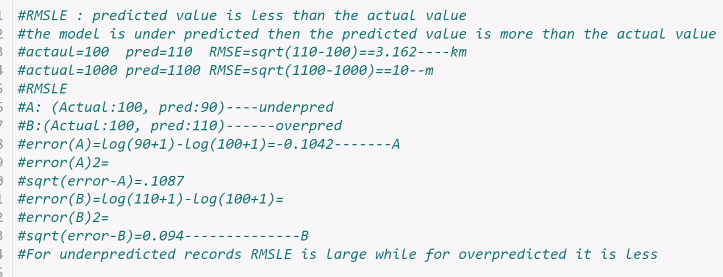

In [43]:
def RMSLE(p,a):
    total=0.0
    for i in range(len(act)):
        pred_val=np.log(pred[i]+1)
        act_val=np.log(act[i]+1)
        total=total+(act_val-pred_val)**2
        global tot_log_error
        tot_log_error=np.sqrt(total/(len(pred)))
        

In [44]:
y1_test=np.array(y_test)

In [45]:
RMSLE(p1,y1_test)
tot_log_error

NameError: name 'act' is not defined

In [46]:
df1=pd.DataFrame({"Actual":y_test,"predicted":p1})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
sns.lmplot()

In [ ]:
impute -> 2 ways => SD,IQR

In [ ]:
SD => GD
IQR => skewed